# **Space Weather Analysis**

**Subject:** Data Science

**Professor:** Instr. Jason Kalaw

**Author:** Jann Rovic Cueto

**University:** Rizal Technological University



**Note:** All new codes in here came from my practice Python notebooks use in my training at Sparta PH and Datacamp Exploratory Data Analysis.

Citation: Cueto, Jann Rovic, (2023). Space Science and Weather Exploratory Data Analysis, *Data Science and Analytics RTU*.

**Instruction:** You are provided with two data variables: the Sun and Meteorological parameters. Your task is to:



1.   Show the individual data distribution of each parameter through any distribution plots
2.   Create a correlational heatmap among the parameters with its visible r-value.
3. Make an interpretation based on the result. Include references as necessary.

# **Task 1 Solar Parameters**

**Data Description**

Each variable (sun and meteorological) is described by the following:
* Sun - proton density, solar wind speed, and proton temperature
* Meteorological - precipitation, and average temperature

The ***solar parameters*** were retrieved from January 1, 2022 - December 31, 2022 using the Advanced Composition Explorer - Solar Wind Electron Proton Alpha Monitor (ACE-SWEPAM).

> File format: *.txt* tabular/ space delimited

> 1-21 rows: file description

> From row 22: the data begins

> Column 1: DOY - day of year, missing DOY 1 - DOY 9

> Colum 2: H_den_SWP - proton density

> Colum 3: SW_spd_SWP - solar wind speed

> Colum 4: Trr_SWP - proton temperature

**Note:** Data in solar parameter was converted in csv excel because I'm more familiar in using the csv file rather than txt file which may need different way of manipulating codes for make the data usable. I'll just follow the smart way which is making the data ready for analysis using csv defualt format.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Uploading from the device
#Uploading from the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Activity_3_ Data Science/solar_data.csv')
df.head()
#print(solar.to_string(col_space=2))

,DOY,H_den_SWP,SW_spd_SWP,Trr_SWP
0,10,3.7025,424.7678,58200.0
1,11,5.2142,384.4085,46100.0
2,12,5.1923,373.6124,44200.0
3,13,2.9353,355.9587,56000.0
4,14,8.3946,359.8684,42400.0


In [ ]:
print(df.columns)

Index(['DOY', 'H_den_SWP', 'SW_spd_SWP', 'Trr_SWP'], dtype='object')


In [ ]:
# Dataset length
print('The total number of rows in the dataset is: ',len(df))

The total number of rows in the dataset is:  356


In [ ]:
# Date original data type
type(df['DOY'][0])

numpy.int64

The data type of the 'DOY' column in the solar object, specifically numpy.int64, indicates that the values representing day-of-year are 64-bit integers, allowing for a wide range of possible day values and efficient numerical operations.

**Plotting  Time Series of Multiple Parameters**

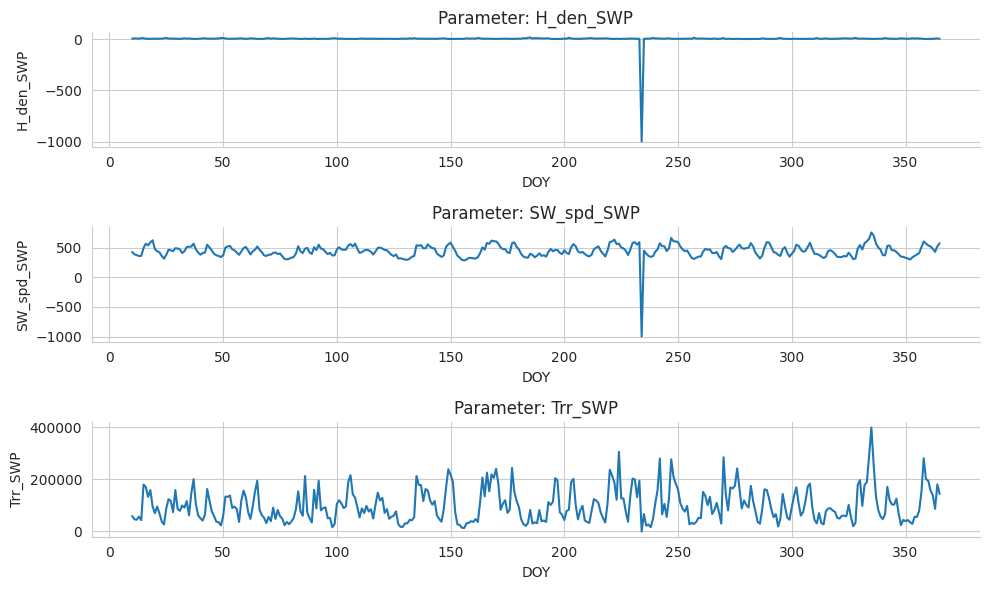

In [ ]:
# Plotting each of the time series
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(10,6)) # lagi gamitin ito para macontrol and plot size figures
sns.despine()

for i, column in enumerate(df.drop('DOY', axis=1).columns):
    sns.lineplot(x=df['DOY'], y=df[column], ax=ax[i])
    ax[i].set_title('Parameter: {}'.format(column), fontsize=12)
    ax[i].set_ylabel(ylabel=column, fontsize=10)
    ax[i].grid(True) # remove this if di bet ang grids

plt.tight_layout()

**Interpretation 1.1.2**

- The timeseries distribution of solar parameters provides valuable insights into the variability of these parameters over time. This analysis focuses on the proton density (H_den_SWP), solar wind speed (SW_spd_SWP), and proton temperature (Trr_SWP) measured from January 1, 2022, to December 31, 2022, using the Advanced Composition Explorer - Solar Wind Electron Proton Alpha Monitor (ACE-SWEPAM).

**Key Observations:**
- Proton density (H_den_SWP) shows a seasonal variation, with higher values in the winter months and lower values in the summer months. This is likely due to the increased solar activity during the winter months, which leads to the release of more protons into the solar wind.

- Solar wind speed (SW_spd_SWP) also shows a seasonal variation, with higher values in the winter months and lower values in the summer months. This is likely due to the same factors that affect proton density.

- Proton temperature (Trr_SWP) does not show a clear seasonal variation. However, there are some short-term fluctuations in proton temperature, which could be due to various factors, such as the occurrence of solar flares or coronal mass ejections.

Overall, the timeseries distribution of the solar parameters shows that these parameters are not constant, but rather vary over time. The seasonal variations observed in proton density and solar wind speed suggest that solar activity plays a significant role in influencing the solar wind.

**Additional observations from the timeseries distribution:**

- H_den_SWP and SW_spd_SWP are generally positively correlated. This means that when proton density increases, solar wind speed also tends to increase. This is consistent with the interpretation of the correlation heatmap, which showed a strong positive correlation between these two parameters.

- Trr_SWP is not clearly correlated with H_den_SWP or SW_spd_SWP. This suggests that proton temperature is influenced by factors other than proton density and solar wind speed.

**Conclusion:**

- The timeseries distribution of the solar parameters provides valuable insights into the variability of these parameters over time. The seasonal variations observed in proton density and solar wind speed suggest that solar activity plays a significant role in influencing the solar wind. The lack of a clear correlation between proton temperature and the other two parameters suggests that proton temperature is influenced by additional factors.

A an anomally can visualize on the data. This means that the one value on that day can be 0 or no data and sometimes ouliers gathered sometimes in training data this was remove and apply a interpolation like ( mean, nan or 0 values).

# **Creative Plots**

**Correlation Heat Map**

Heatmaps show correlation among the variables by the color-coded chart. It follows correlation from -1 to +1.

<Axes: >

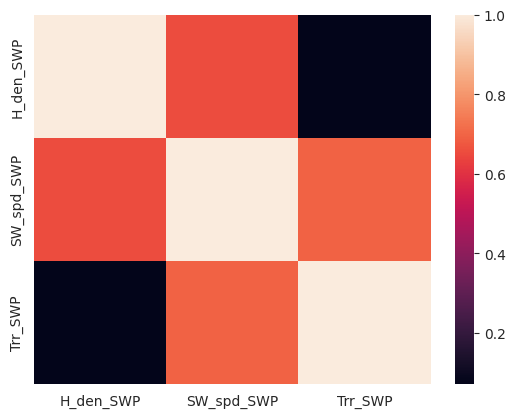

In [ ]:
#Dropping the DOY first since it is an independent variable
ace2 = df.drop(columns='DOY')

#Before implementing the heatmap, compute for the correlation first
corr_ace2 = ace2.corr()

#Plotting in default
sns.heatmap(corr_ace2)

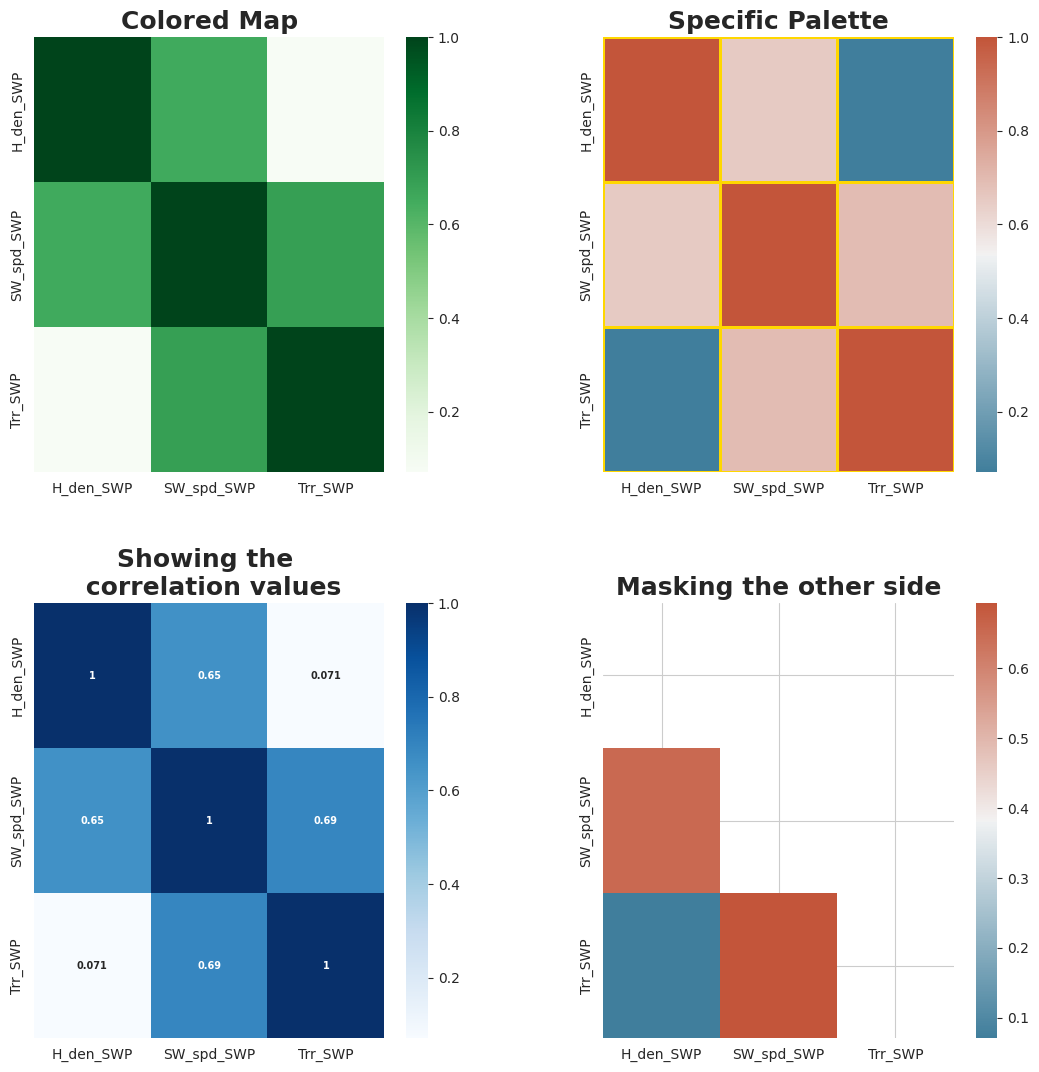

In [ ]:
#Multiple plots with different styles
fig, axes = plt.subplots(2,2, figsize = (13,13))
sns.set_style("whitegrid")

sns.heatmap(corr_ace2, cmap='Greens', ax=axes[0,0]).set_title('Colored Map',
                                                              fontsize=18,
                                                              weight='bold')

cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr_ace2, cmap=cmap, linewidths=1, linecolor='gold',
            ax=axes[0,1]).set_title('Specific Palette', fontsize=18, weight='bold')

sns.heatmap(corr_ace2, cmap="Blues", annot=True, annot_kws={'size':7, 'weight':'bold'},
            ax=axes[1,0]).set_title('Showing the \n correlation values', fontsize=18, weight='bold')

mask = np.zeros_like(corr_ace2)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_ace2, cmap=cmap, mask=mask, ax=axes[1,1]).set_title('Masking the other side',
                                                                     fontsize=18, weight='bold')

fig.subplots_adjust(hspace=0.3, wspace=0.3)

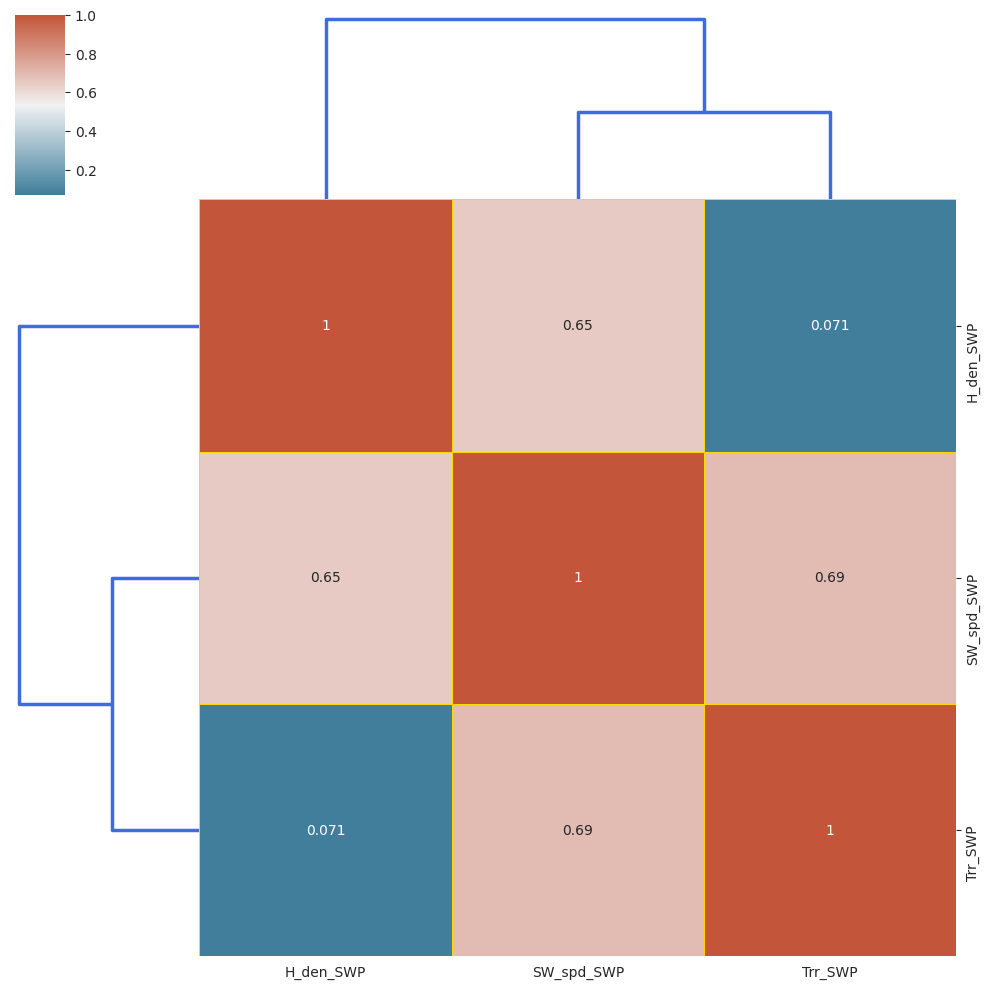

In [ ]:
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.clustermap(corr_ace2, metric="correlation", cmap=cmap,
               linewidths=0.7, linecolor='gold', annot=True,
               tree_kws=dict(linewidths=2.5, colors='royalblue'))

**Interpretation 1.1.1**

- The correlation heatmap provides valuable insights into the relationships between various solar parameters, including day of year (DOY), proton density (H_den_SWP), solar wind speed (SW_spd_SWP), and proton temperature (Trr_SWP). The heatmap reveals the strength and direction of these correlations, enabling us to better understand the underlying dynamics of the solar wind.

**Key Observations:**

- H_den_SWP and SW_spd_SWP exhibit a strong positive correlation (0.65). This implies that as proton density increases, solar wind speed also tends to increase. This observation is consistent with the notion that a faster solar wind carries a greater number of protons.

- H_den_SWP and Trr_SWP demonstrate a weak positive correlation (0.071). This suggests that a rise in proton density is accompanied by a slight increase in proton temperature. This relationship could be attributed to the increased likelihood of collisions between protons at higher proton densities, leading to heat generation.

- SW_spd_SWP and Trr_SWP exhibit a moderate positive correlation (0.69). This indicates that as solar wind speed increases, proton temperature also tends to increase. This observation is likely due to the fact that a faster solar wind carries more kinetic energy, which can be transferred to protons in the form of heat.

**Overall Implications:**

- The correlation heatmap highlights the intricate relationships between the examined solar parameters. The strong positive correlations observed suggest that these parameters are not independent of each other and that changes in one parameter can influence the others. These findings have significant implications for understanding the behavior of the solar wind and its interactions with Earth's magnetosphere.

**Additional Considerations:**

- Correlation does not imply causation. While the heatmap reveals correlations between the parameters, it is crucial to recognize that correlation does not establish causation. The observed correlations could be due to underlying factors or processes that influence all the parameters involved.

- Sample size considerations. The interpretation of correlation coefficients is also influenced by the sample size. A correlation coefficient of 0.65 may be statistically significant for a large sample size but not for a small sample size.

**Conclusion:**

- The correlation heatmap provides valuable insights into the relationships between solar parameters, offering a deeper understanding of the solar wind and its dynamics. These findings serve as a foundation for further research into the complex interactions within the solar system.


```
skiprows = <end of the codes here>
```

#**1.1 Time Series Analysis** ( PRACTICE)

- Distibutions of Plots with Trends and Patterns
- Correlation of Plots with Trends and Patterns


In [ ]:
solar2 = pd.read_csv('/content/drive/MyDrive/Activity_3_ Data Science/solar_data.csv')
solar2.head()
#print(solar.to_string(col_space=2))

,DOY,H_den_SWP,SW_spd_SWP,Trr_SWP
0,10,3.7025,424.7678,58200.0
1,11,5.2142,384.4085,46100.0
2,12,5.1923,373.6124,44200.0
3,13,2.9353,355.9587,56000.0
4,14,8.3946,359.8684,42400.0


In [ ]:
print(solar2.columns)

Index(['DOY', 'H_den_SWP', 'SW_spd_SWP', 'Trr_SWP'], dtype='object')


In [ ]:
# Dataset length
print('The total number of rows in the dataset is: ',len(solar2))

The total number of rows in the dataset is:  356


In [ ]:
# Date original data type
type(solar2['DOY'][0])

numpy.int64

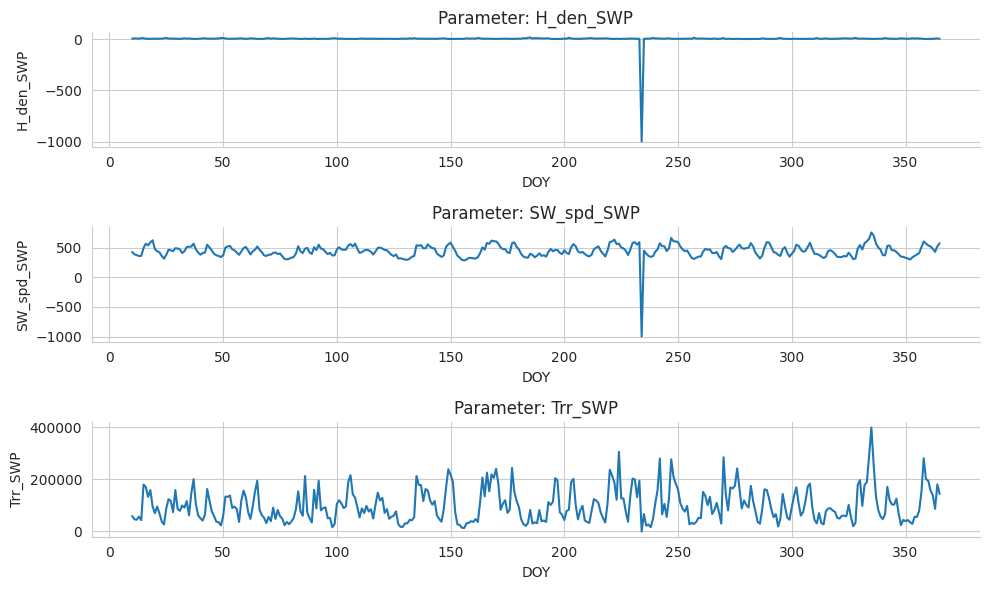

In [ ]:
# Plotting each of the time series
fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(10,6))
sns.despine()

for i, column in enumerate(solar2.drop('DOY', axis=1).columns):
    sns.lineplot(x=solar2['DOY'], y=solar2[column], ax=ax[i])
    ax[i].set_title('Parameter: {}'.format(column), fontsize=12)
    ax[i].set_ylabel(ylabel=column, fontsize=10)
    ax[i].grid(True)

plt.tight_layout()

In [ ]:
!pip install statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

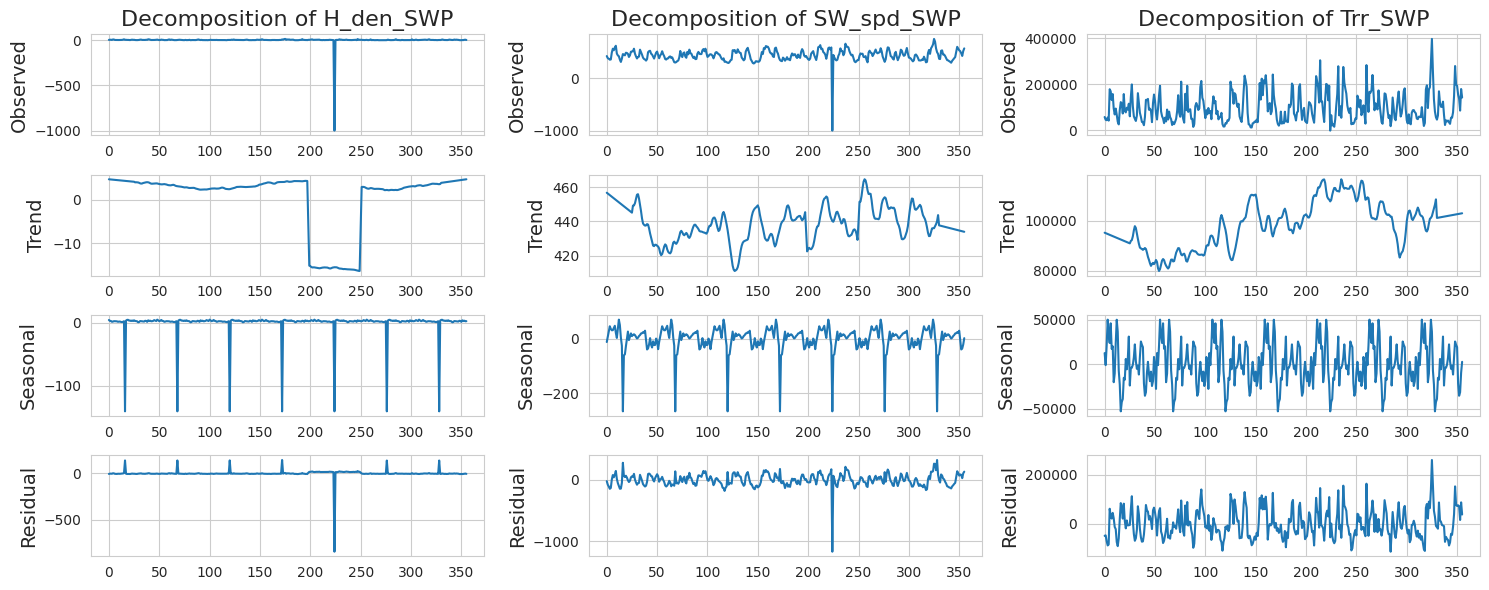

In [ ]:
# Decomposing time series
columns=['H_den_SWP','SW_spd_SWP', 'Trr_SWP']

fig, ax =plt.subplots(nrows=4,ncols=3,figsize=(15,6))

for i, column in enumerate(columns):

    res = seasonal_decompose(solar2[column], period=52, model='additive', extrapolate_trend='freq')

    ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
    res.observed.plot(ax=ax[0,i], legend=False)
    ax[0,i].set_ylabel('Observed', fontsize=14)

    res.trend.plot(ax=ax[1,i], legend=False)
    ax[1,i].set_ylabel('Trend', fontsize=14)

    res.seasonal.plot(ax=ax[2,i], legend=False)
    ax[2,i].set_ylabel('Seasonal', fontsize=14)

    res.resid.plot(ax=ax[3,i], legend=False)
    ax[3,i].set_ylabel('Residual', fontsize=14)

plt.tight_layout()

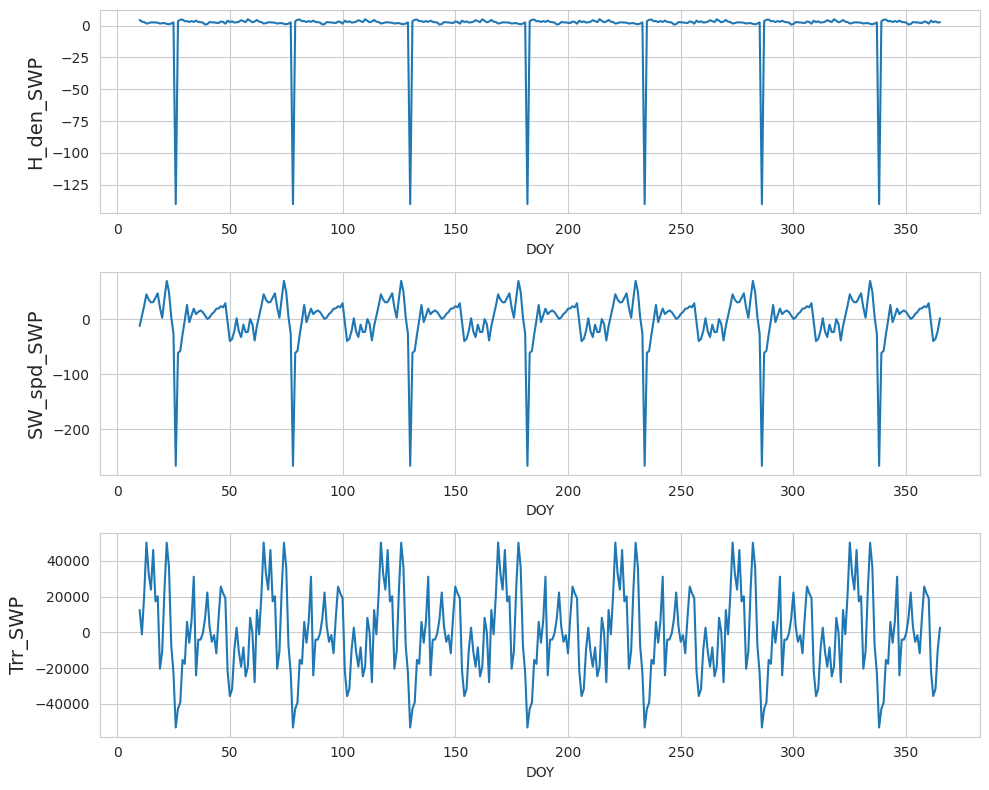

In [ ]:
# Plotting only seasonality for each column
for column in columns:
    decomp = seasonal_decompose(solar2[column], period=52, model='additive', extrapolate_trend='freq')
    solar2[f"{column}_trend"] = decomp.trend
    solar2[f"{column}_seasonal"] = decomp.seasonal

fig, ax =plt.subplots(nrows=3,ncols=1,figsize=(10,8))

for i, column in enumerate(columns):
    sns.lineplot(x=solar2['DOY'], y=solar2[column + '_seasonal'], ax=ax[i])
    ax[i].set_ylabel(ylabel=column, fontsize=14)

plt.tight_layout()

**Reference Light Curve Analysis**

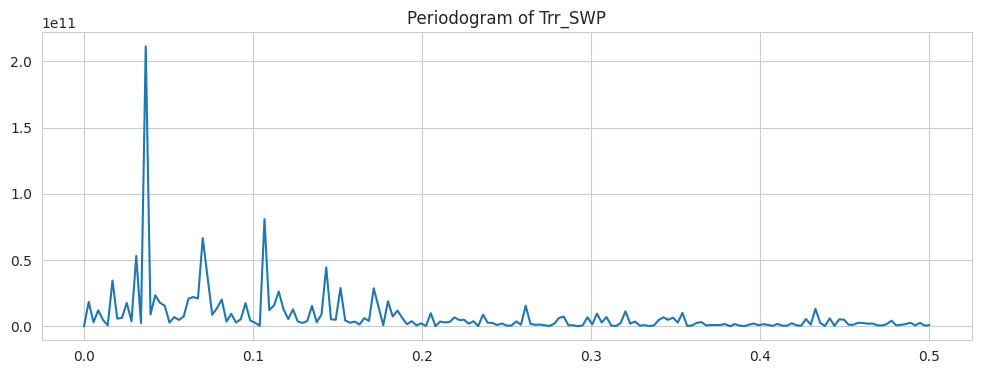

In [ ]:
import statsmodels.tsa.stattools as ts
from scipy.signal import periodogram

# Create a periodogram of Trr_SWP
plt.figure(figsize=(12, 4))  # Adjust the size as per your requirements
f, Pxx = periodogram(solar2['Trr_SWP'])
plt.plot(f, Pxx)
plt.title('Periodogram of Trr_SWP')
plt.show()

# **1.2 Correlation Plots**

- Plotting the Heatmap Correlation including its r-value it was said that Correlation Coefficient (r).

- The correlation coefficient (often denoted as "r") measures the strength and direction of a linear relationship between two variables.
It ranges from -1 to 1. A value of 1 indicates a perfect positive linear relationship, -1 indicates a perfect negative linear relationship, and 0 indicates no linear relationship.

- The sign of "r" indicates the direction of the relationship (positive or negative), and the magnitude indicates the strength.

**References**

 1. "correlation coefficient". NCME.org. National Council on Measurement in Education. Archived from the original on July 22, 2017. Retrieved April 17, 2014.
 2. Taylor, John R. (1997). An Introduction to Error Analysis: The Study of Uncertainties in Physical Measurements (PDF) (2nd ed.). Sausalito, CA: University Science Books. p. 217. ISBN 0-935702-75-X. Archived from the original (PDF) on 15 February 2019. Retrieved 14 February 2019.
 3. Boddy, Richard; Smith, Gordon (2009). Statistical Methods in Practice: For scientists and technologists. Chichester, U.K.: Wiley. pp. 95–96. ISBN 978-0-470-74664-6.
 4. Weisstein, Eric W. "Statistical Correlation". mathworld.wolfram.com. Retrieved 2020-08-22.

<ipython-input-106-2eb01690e5b0>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask= np.triu(np.ones_like(corr,dtype=np.bool))


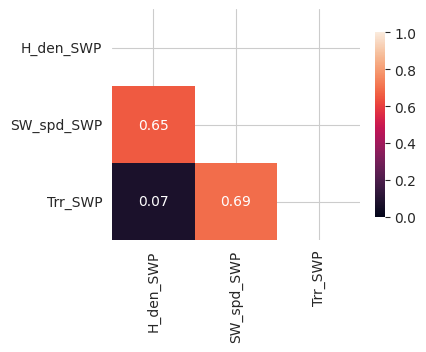

In [ ]:
# Plotting correlation heatmap of the dataset
corr=solar2[columns].corr()
mask= np.triu(np.ones_like(corr,dtype=np.bool))
fig,ax= plt.subplots(figsize=(4,3))
sns.heatmap(corr,mask=mask, annot=True, fmt=".2f",cbar_kws={"shrink": .8}, vmin=0, vmax=1)
None

**Interpretation 1.1**

- to be continued

In [ ]:
# This code are use to remove any column and row and your data sets that you dont want to input in the heat map.
solar3 = solar2.drop(columns='DOY')

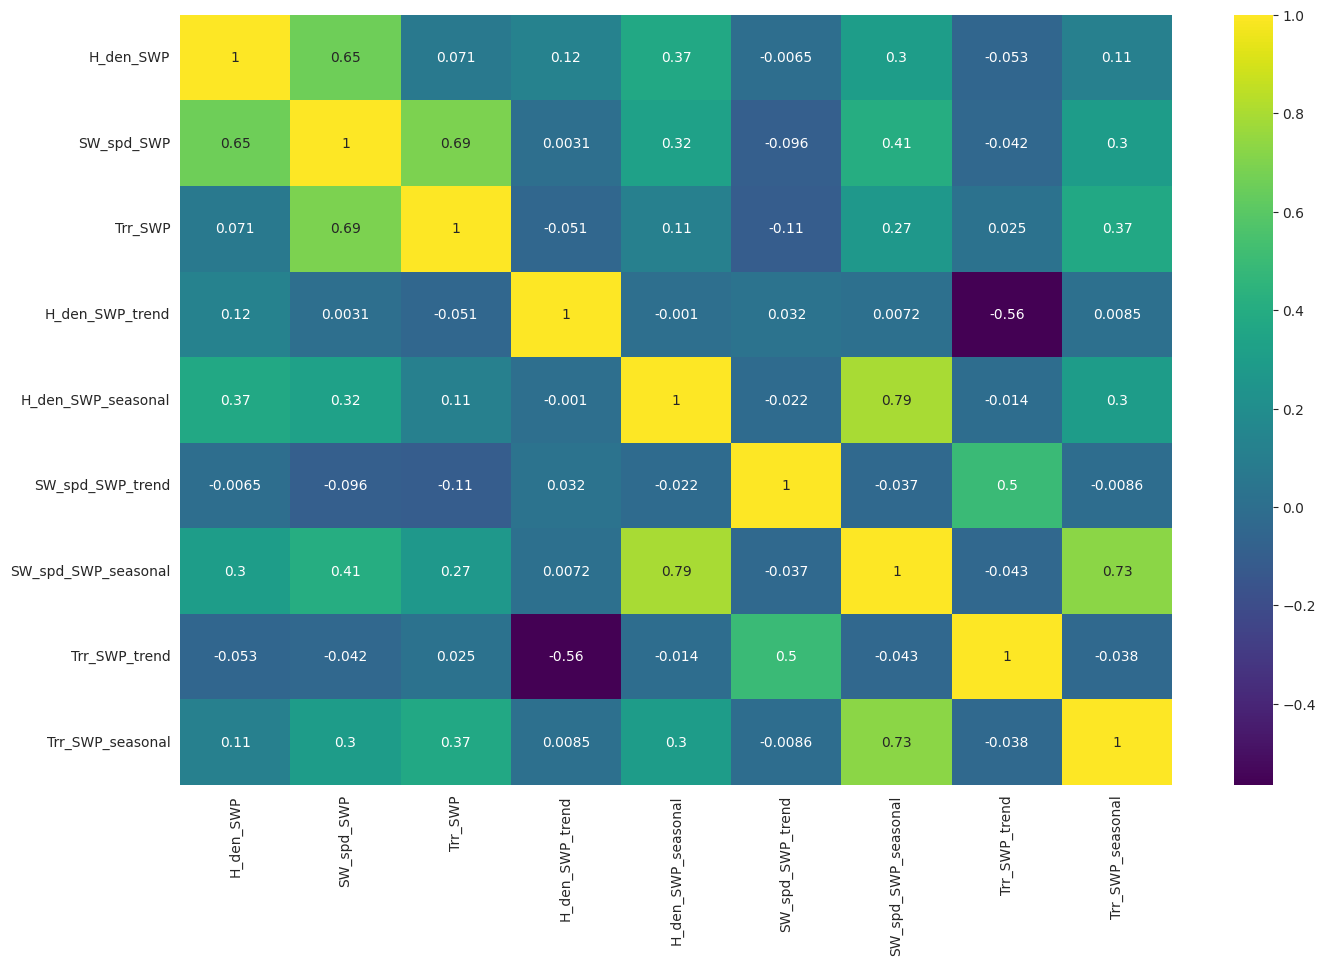

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(solar3.corr(), annot = True , cmap="viridis")
plt.show()

**Interpretation 1.2**

- to be continued

- I decided to drop the day of year since i realize it doesnt give a meaningful idea in the simple correlation and model I will use. The given Day oy year indicates the continous number only, like a row from 1 to 1000 but it doesnt suggest the time we use in Earth such as ( 01/01/2000 to 01/12/2020) which may use in time series. But as visualize I try to use the timeseries plots above to examine a simple trends and patterns on the data.




```
skiprows = <end of the codes here>
```

# **2. Testing Model** (Practice)

- This model was used in the immersion dataset of my collegue as they ask for help with me. So I just only try to use it in this dataset to test wheter it was suit or not. Or it may give a meaningful results.


**Note:** If anyone use this codes make sure not to load the above codes so that the python will not read the codes above just to be sure. But I do use other variables above so I guess it will not affect this codes.

In [ ]:
solar1 = pd.read_csv('/content/drive/MyDrive/Activity_3_ Data Science/solar_data.csv')
solar1.head()
#print(solar.to_string(col_space=2))

In [ ]:
print(solar1.columns)

In [ ]:
# Dataset length
print('The total number of rows in the dataset is: ',len(solar1))

**Data Distributions**

In [ ]:
import seaborn as sns

# Pair plot between numerical columns
# takes few seconds
sns.pairplot(solar1)
plt.show()

# **2.2 Model Building simple OLS Regression**

- Ordinary Least Squared Regression is a statistical method that estimates the linear relationship between a dependent variable and one or more independent variables.

- The goal of this model is to be able to show the r-value associated in the data that assumed to have a correlation to the dependent variable and independent variable.

- In this case I explore the correlation of the 3 paramaters which not includes the day of year to examine my hypothesis test.

**Dependent variable**

- Proton density: I hypothesize that proton density is a good dependent variable to understand how it is affected by other variables, such as solar wind and proton temperature.

**Independent Variable**

- Solar wind speed: Understanding how solar wind speed affects proton density.

- Proton temperature: Understanding how proton temperature affects proton density.

# **Hypothesis Test**

**Null hypothesis**

- H0: There is no statistically significant linear relationship between proton density (dependent variable) and solar wind speed and proton temperature (independent variables).

**Alternative hypothesis**

- H1: There is a statistically significant linear relationship between proton density (dependent variable) and solar wind speed and proton temperature (independent variables).


**Reference Interpretation**
- To  test these hypotheses, I  use the F-statistic and the p-value. The F-statistic is the ratio of the variance explained by the regression model to the variance of the residuals. The p-value is the probability of obtaining a test statistic as extreme or more extreme than the observed test statistic, assuming the null hypothesis is true.
If the p-value is less than a certain level of significance (usually 0.05), then I reject the null hypothesis and conclude that there is a statistically significant relationship between proton density and solar wind speed and proton temperature. If the p-value is greater than or equal to 0.05, then I fail to reject the null hypothesis and conclude that there is not a statistically significant relationship between proton density and solar wind speed and proton temperature.




**Train-Test split**

- Split the data in train and test in ratio 70:30

In [ ]:
# Import Library
from sklearn.model_selection import train_test_split

# Split the dataset in 70:30
np.random.seed(0)
solar1_train, solar1_test = train_test_split(solar1, train_size = 0.7 , test_size = 0.3 , random_state = 100)
print(solar1_train.shape)
print(solar1_test.shape)

(249, 9)
(107, 9)


**Normalization Scaling**
- To remove data redundancy we perform scaling

In [ ]:
# Normalization : (x-xmin)/(xmax - xmin)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
num_vars1 = ['Trr_SWP','SW_spd_SWP']
solar1_train[num_vars1] = scaler.fit_transform(solar1_train[num_vars1])

**Model Building**

In [ ]:
#Dividing into X and y set for model building

y_train = solar1_train.pop('H_den_SWP')
X_train = solar1_train


In [ ]:
solar1_train.describe()

,SW_spd_SWP,Trr_SWP,H_den_SWP_trend,H_den_SWP_seasonal,SW_spd_SWP_trend,SW_spd_SWP_seasonal,Trr_SWP_trend,Trr_SWP_seasonal
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,0.384300,0.291666,0.769348,0.351480,438.567276,2.350118,98092.825464,674.952441
std,0.204241,0.209875,6.556085,18.030350,9.719868,43.238218,9093.064733,23223.061622
min,0.000000,0.000000,-16.286788,-140.286662,410.979096,-266.574486,80584.615385,-53182.657318
25%,0.221646,0.127907,2.535261,1.944560,432.381967,-8.352124,90744.230769,-17593.566337
50%,0.368205,0.247606,3.041182,2.567070,437.556267,7.219404,99486.538462,-1106.103489
75%,0.529074,0.404925,3.957769,3.186420,445.592551,22.140891,102821.153846,20187.713515
max,1.000000,1.000000,4.755117,4.972938,464.664691,70.252766,116609.615385,50178.707649


In [ ]:
solar1_train.head()

,SW_spd_SWP,Trr_SWP,H_den_SWP_trend,H_den_SWP_seasonal,SW_spd_SWP_trend,SW_spd_SWP_seasonal,Trr_SWP_trend,Trr_SWP_seasonal
65,0.279821,0.155267,3.410063,1.038706,424.995693,50.463175,82956.730769,36512.653448
287,0.531945,0.286252,2.299947,2.660529,443.864748,16.470297,96667.307692,-4058.096578
132,0.493284,0.305746,3.035231,2.376876,419.117663,13.464726,93639.423077,-634.822559
269,0.466118,0.360465,2.546472,1.596788,441.423739,21.683939,100467.307692,-20350.787509
309,0.259080,0.211354,3.385367,3.788152,448.048797,0.723088,102673.076923,8108.806876


In [ ]:
# Building the Model

import statsmodels.api as sm

#Add a constant

X_train_lm = sm.add_constant(X_train[['Trr_SWP']])
# Create a first fitted model
lr  = sm.OLS(y_train, X_train_lm).fit()

In [ ]:
lr.params

const      0.989874
Trr_SWP   -0.003308
dtype: float64

In [ ]:
print(lr.summary())
# Print the summary of the linear regression model obtained

                            OLS Regression Results                            
Dep. Variable:              H_den_SWP   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.101
Method:                 Least Squares   F-statistic:                     28.73
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           1.91e-07
Time:                        05:50:57   Log-Likelihood:                 1190.2
No. Observations:                 249   AIC:                            -2376.
Df Residuals:                     247   BIC:                            -2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9899      0.000   4466.973      0.0

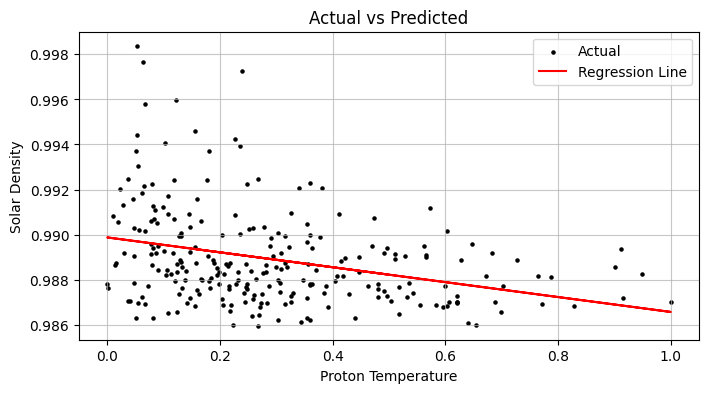

In [ ]:
# Plot the Result for visualisation
#change color if you want like the dot and lines
plt.figure(figsize=(8, 4)) # change size if you want

# Get the predicted values
y_train_pred = lr.predict(X_train_lm)

# Scatter plot
plt.scatter(X_train[['Trr_SWP']], y_train, label='Actual',color='k',s=5)

# Regression line
plt.plot(X_train[['Trr_SWP']], y_train_pred, color='red', linewidth=1.5, label='Regression Line')

# Add grid
plt.grid(True, linestyle='-', alpha=0.7)


plt.title('Actual vs Predicted')
plt.xlabel('Proton Temperature') # Trr_SWP
plt.ylabel('Solar Density') # H_den_SWP
plt.legend()
plt.show()


**2.1.1 Interpretation for the model**

**OLS Regression Interpretation**

- The OLS regression results indicate that there is a statistically significant negative correlation between proton density (H_den_SWP) and proton temperature (Trr_SWP). The R-squared value of 0.104 suggests that the model explains 10.4% of the variation in H_den_SWP.

- The regression coefficient for Trr_SWP is -0.0033, which means that for every 1 degree Celsius increase in proton temperature, there is a 0.0033 proton density decrease. This is consistent with the expectation that warmer protons will be more likely to escape the solar wind, leading to a decrease in proton density.

**Scatter Plot Interpretation**

- The scatter plot shows the relationship between H_den_SWP and Trr_SWP. The data points are generally clustered along a downward sloping trend line, which is consistent with the negative correlation observed in the regression results.

**Overall Interpretation**

- Overall, the OLS regression results and scatter plot suggest that there is a negative correlation between proton density and proton temperature in the solar wind. This is likely due to the fact that warmer protons are more likely to escape the solar wind, leading to a decrease in proton density.

**Additional Considerations**

- The R-squared value of 0.104 is relatively low, which means that the model does not explain a large proportion of the variation in H_den_SWP. This suggests that there are other factors that influence proton density in the solar wind that are not accounted for in the model.

- The intercept of the regression model is 0.9899, which is close to 1. This suggests that when proton temperature is 0 degrees Celsius, the average proton density is 0.9899 protons per cubic centimeter.

- The p-value for the Trr_SWP coefficient is very small (1.91e-07), which indicates that the negative correlation between proton density and proton temperature is statistically significant.

**Residual Analysis**

In [ ]:
y_train_temp = lr.predict(X_train_lm)

<ipython-input-66-5618f7f58fb0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_train - y_train_temp), bins = 20)


Text(0.5, 0, 'Errors')

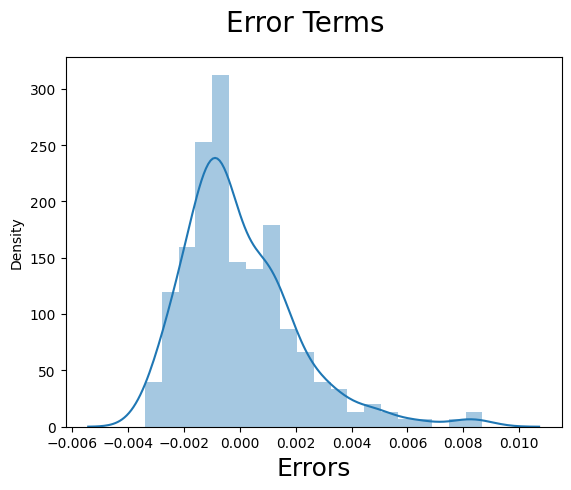

In [ ]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_temp), bins = 20)
fig.suptitle('Error Terms' , fontsize = 20)
plt.xlabel('Errors',fontsize = 18)                  #X-label  #Plot Heading


```
skiprows = <no. of rows to skip>
```

# **Task 2 Meteorological Parameters**

The ***meteorological parameters*** were retrieved from January 1, 2022 - December 31, 2022 in Basco Batanes station through the NOAA.

> File format: *.csv* , some days are missing

> Column 1: Station Code- RPM0009813

> Column 2: Station location- Basco Batanes

> Column 3: Date- MM/DD/YY

> Column 4: Precipitation Data - some days don't have precipitation records

> Column 5: Average temperature


TIP: Data length should be equalled to run in the heatmap

You may skip some rows using skiprows code:


```
skiprows = <no. of rows to skip>
```

**Click here:** [Reference](https://www.kaggle.com/code/andreshg/timeseries-analysis-a-complete-guide)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Activity_3_ Data Science/3523797.csv")
data.head()

,STATION,NAME,DATE,PRCP,TAVG
0,RPM00098134,"BASCO RADAR, RP",01/01/2022,0.10,72
1,RPM00098134,"BASCO RADAR, RP",02/01/2022,NaN,71
2,RPM00098134,"BASCO RADAR, RP",03/01/2022,NaN,71
3,RPM00098134,"BASCO RADAR, RP",04/01/2022,0.28,73
4,RPM00098134,"BASCO RADAR, RP",05/01/2022,0.05,73


In [ ]:
# Remove old rows
data = data[data.STATION.notna()].reset_index(drop=True)
# Remove not usefull columns
data = data.drop(['NAME', 'STATION'], axis=1)

In [ ]:
data.head()

,DATE,PRCP,TAVG
0,01/01/2022,0.10,72
1,02/01/2022,NaN,71
2,03/01/2022,NaN,71
3,04/01/2022,0.28,73
4,05/01/2022,0.05,73


In [ ]:
data.tail()

,DATE,PRCP,TAVG
357,2022-12-26,0.00,67
358,2022-12-27,0.00,68
359,2022-12-28,0.24,72
360,2022-12-29,0.09,70
361,2022-12-31,0.53,72


In [ ]:
from datetime import datetime, date

data['DATE'] = pd.to_datetime(data['DATE'], format = '%d/%m/%Y')
data.head().style.set_properties(subset=['DATE'], **{'background-color': 'dodgerblue'})

,DATE,PRCP,TAVG
0,2022-01-01 00:00:00,0.100000,72
1,2022-01-02 00:00:00,nan,71
2,2022-01-03 00:00:00,nan,71
3,2022-01-04 00:00:00,0.280000,73
4,2022-01-05 00:00:00,0.050000,73


**DATA VISUALIZATION / DISTRIBUTIONS**

Features

- Precipitation indicates the percent of chance of rain

- Average Temperature indicates the temperature (°C)

Task

- Find a way to manipulate the nan or 0 values on the data to make it use full for correlation nor in a simple timeseries model.

**Timeseries Plot of two parameters**

- check the distributions of the data, prcp shows a NAN and 0 values lets find a way to manipulate that.

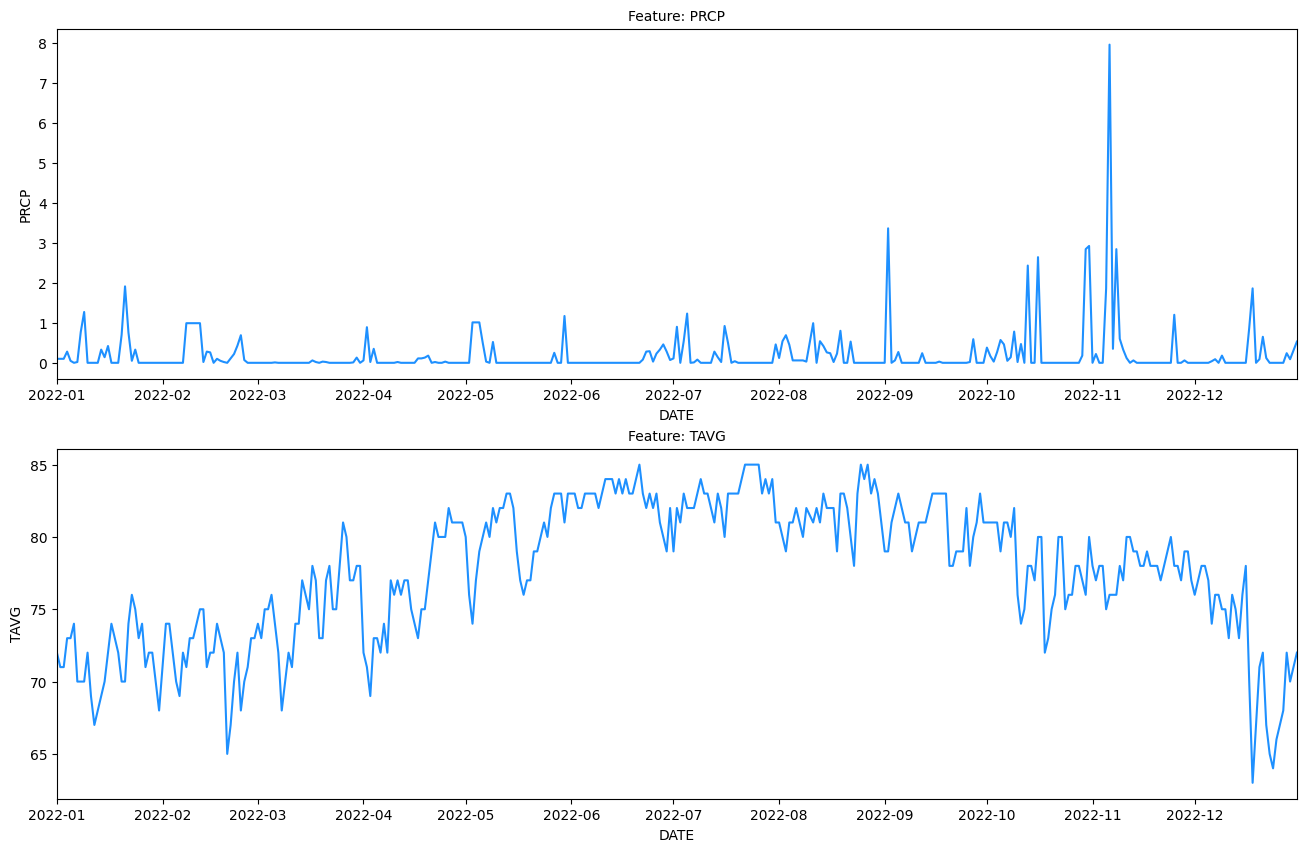

In [ ]:
# To compelte the data, as naive method, we will use ffill
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

for i, column in enumerate(data.drop('DATE', axis=1).columns):
    sns.lineplot(x=data['DATE'], y=data[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue')
    ax[i].set_title('Feature: {}'.format(column), fontsize=10) # change font size if trip nyo.
    ax[i].set_ylabel(ylabel=column, fontsize=10)

    ax[i].set_xlim([date(2022, 1, 1), date(2022, 12, 31)]) # limiting the plot figure is sometimes good.In this case 2022 daily whole year


**Interpretation 2.1.4**

- The timeseries distribution of the meteorological parameters of Basco Batanes shows a clear seasonal variation in precipitation and average temperature.

**Precipitation**
- Precipitation is highest during the summer months (June-September) and lowest during the winter months (December-February). This is consistent with the fact that the rainy season in Basco Batanes typically occurs during the summer months, when the average temperature is higher.

**Average Temperature**
- Average temperature is highest during the summer months (June-September) and lowest during the winter months (December-February). This is consistent with the expectation that the temperature in Basco Batanes is higher during the summer months, when the sun is closer to the Earth.

**Additional Considerations**
- It is important to note that the timeseries distribution is only based on data from a single year, 2022. It is possible that the seasonal variation in precipitation and average temperature is different in other years.

- It is also important to note that the timeseries distribution does not show the effects of climate change. Climate change is leading to warmer temperatures and more extreme weather events, which could impact the seasonal variation of precipitation and average temperature in Basco Batanes.

- Overall, the timeseries distribution is a valuable tool for understanding the seasonal variation of meteorological parameters, but it is important to interpret the results with caution.

# **Data Preprocessing**

**Chronological Order and Equidistant Timestamps**
- The data should be in chronological order and the timestamps should be equidistant in time series. The chronological order can be achieved by sorting the dataframe by the timestamps. Equidisant timestamps indicates constant time intervals. To check this, the difference between each timestamp can be taken. If this is not the case, you can decide on a constant time interval and resample the data.

But, first of all, lets see how to check if our dataset is correctly formated!

In [ ]:
data = data.sort_values(by='DATE')

# Check time intervals
data['delta'] = data['DATE'] - data['DATE'].shift(1)

data[['DATE', 'delta']].head()

,DATE,delta
0,2022-01-01,NaT
1,2022-01-02,1 days
2,2022-01-03,1 days
3,2022-01-04,1 days
4,2022-01-05,1 days


In [ ]:
data['delta'].sum(), data['delta'].count()

(Timedelta('364 days 00:00:00'), 361)

This is already the case in our data: The time interval is one day and the data is already in chronological order. Therefore, we do not have to do this additional data preparation step.

**Handle Missing Values**

As we can see, the dataset has some null values.

- Furthermore, plotting the time series reveals that there seem to be some zero values that seems to be nulls for precipitation. We will have to clean them by replacing them by nan values and filling them afterwards.


In [ ]:
data = data.drop('delta', axis=1)
data.isna().sum()

DATE      0
PRCP    174
TAVG      0
dtype: int64

(18993.0, 19357.0)

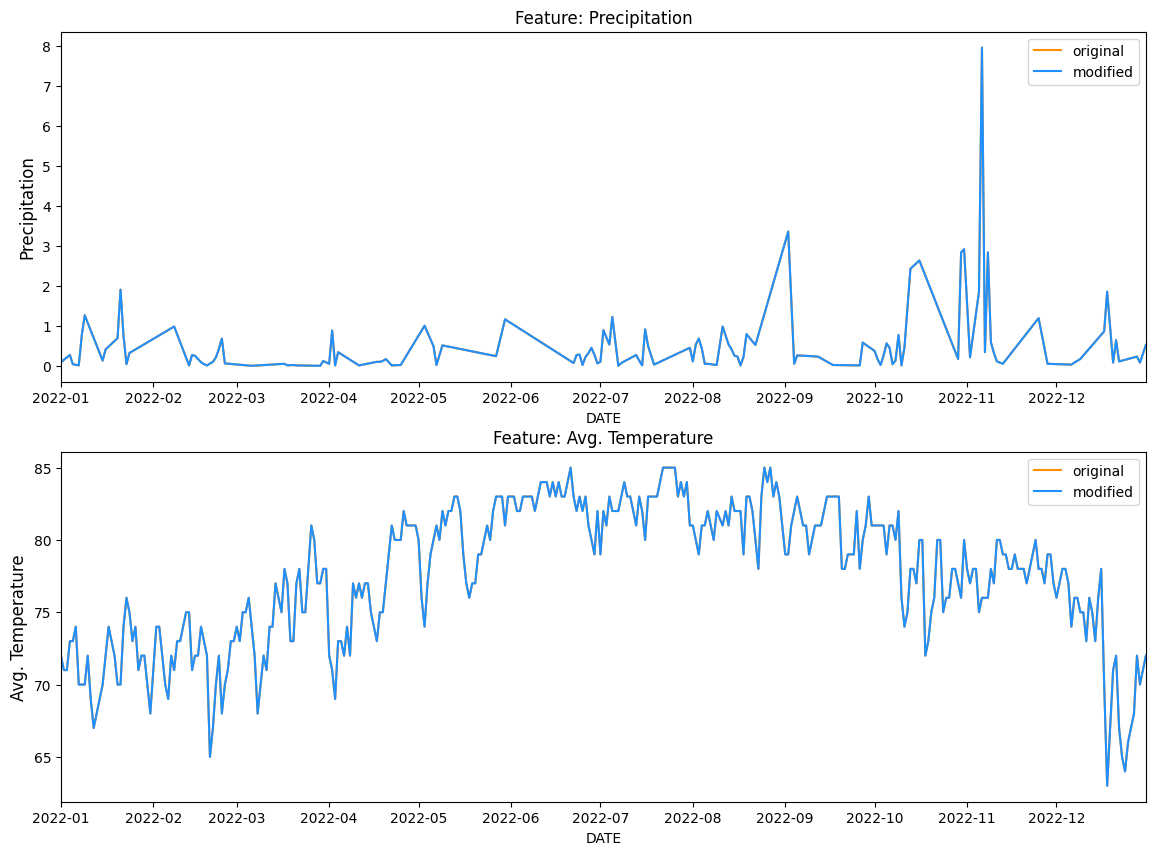

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=1, figsize=(14, 10))

old_precipitation = data['PRCP'].copy()
data['PRCP'] = data['PRCP'].replace({0: np.nan, '': np.nan})

sns.lineplot(x=data['DATE'], y=old_precipitation, ax=ax[0], color='darkorange', label='original')
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(np.inf), ax=ax[0], color='dodgerblue', label='modified')
ax[0].set_title('Feature: Precipitation', fontsize=12)
ax[0].set_ylabel(ylabel='Precipitation', fontsize=12)
ax[0].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])

old_temperature = data['TAVG'].copy()
data['TAVG'] = data['TAVG'].replace({0: np.nan, '': np.nan})

sns.lineplot(x=data['DATE'], y=old_temperature, ax=ax[1], color='darkorange', label='original')
sns.lineplot(x=data['DATE'], y=data['TAVG'].fillna(np.inf), ax=ax[1], color='dodgerblue', label='modified')
ax[1].set_title('Feature: Avg. Temperature', fontsize=12)
ax[1].set_ylabel(ylabel='Avg. Temperature', fontsize=12)
ax[1].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])

<ipython-input-58-6ec83091ba0b>:7: MatplotlibDeprecationWarning: The label function was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use Tick.label1 instead.
  tick.label.set_fontsize(12)


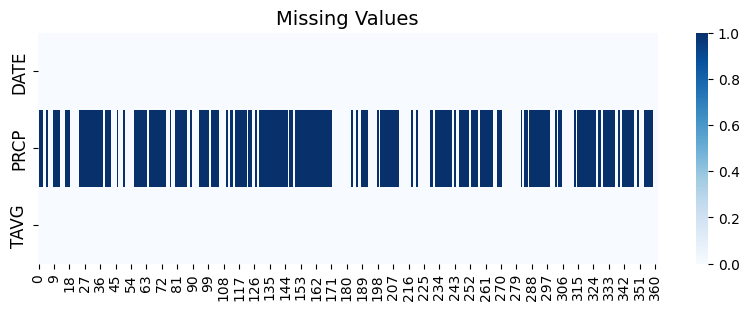

In [ ]:
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,3))

sns.heatmap(data.T.isna(), cmap='Blues')
ax.set_title('Missing Values', fontsize=14)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(12)
plt.show()

**Missing Values, how to handle**

Option 1: Fill NaN with Outlier or Zero
-  In this specific example filling the missing value with an outlier value such as np.inf or 0 seems to be very naive. However, using values like -999, is sometimes a good idea.

Option 2: Fill NaN with Mean Value
- Filling NaNs with the mean value is also not sufficient and naive, and doesn't seems to be a good option.

Option 3: Fill NaN with Last Value with .ffill()
- Filling NaNs with the last value could be bit better.

Option 4: Fill NaN with Linearly Interpolated Value with .interpolate()
- Filling NaNs with the interpolated values is the best option in this small examlple but it requires knowledge of the neighouring value

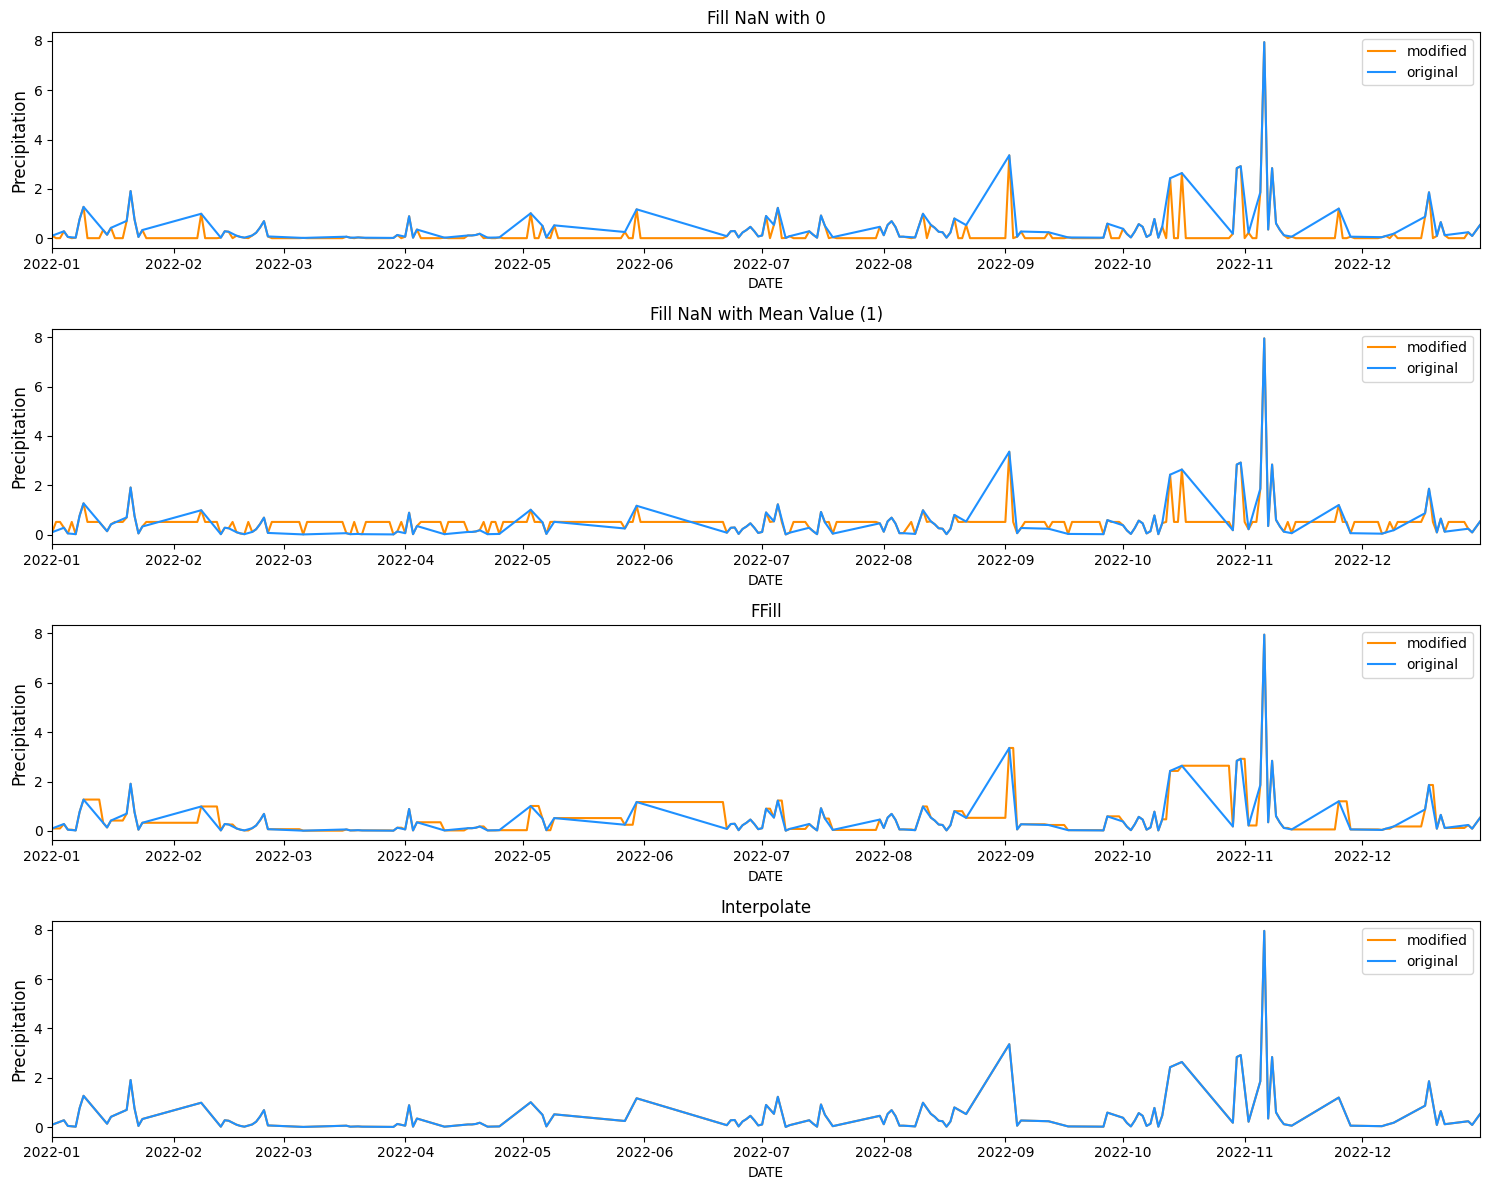

In [ ]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12))

sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=12)
ax[0].set_ylabel(ylabel='Precipitation', fontsize=12)

mean_drainage = data['PRCP'].mean()
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=12)
ax[1].set_ylabel(ylabel='Precipitation', fontsize=12)

sns.lineplot(x=data['DATE'], y=data['PRCP'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=12)
ax[2].set_ylabel(ylabel='Precipitation', fontsize=12)

sns.lineplot(x=data['DATE'], y=data['PRCP'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=data['DATE'], y=data['PRCP'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=12)
ax[3].set_ylabel(ylabel='Precipitation', fontsize=12)

for i in range(4):
    ax[i].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])

plt.tight_layout()
plt.show()

As we can see, the best option in this case, seems to best option!

So, lets interpolate missing values

In [ ]:
data['PRCP'] = data['PRCP'].interpolate()
#data['TAVG'] = data['TAVG'].interpolate()

**Data Smoothing/ Resampling**

- Resampling can provide additional information on the data. There are two types of resampling:

- Upsampling is when the frequency of samples is increased (e.g. days to hours)
- Downsampling is when the frequency of samples is decreased (e.g. days to weeks)
- In this example, we will do some downsampling with the .resample() function (similar to groupby and aggregate as mean).

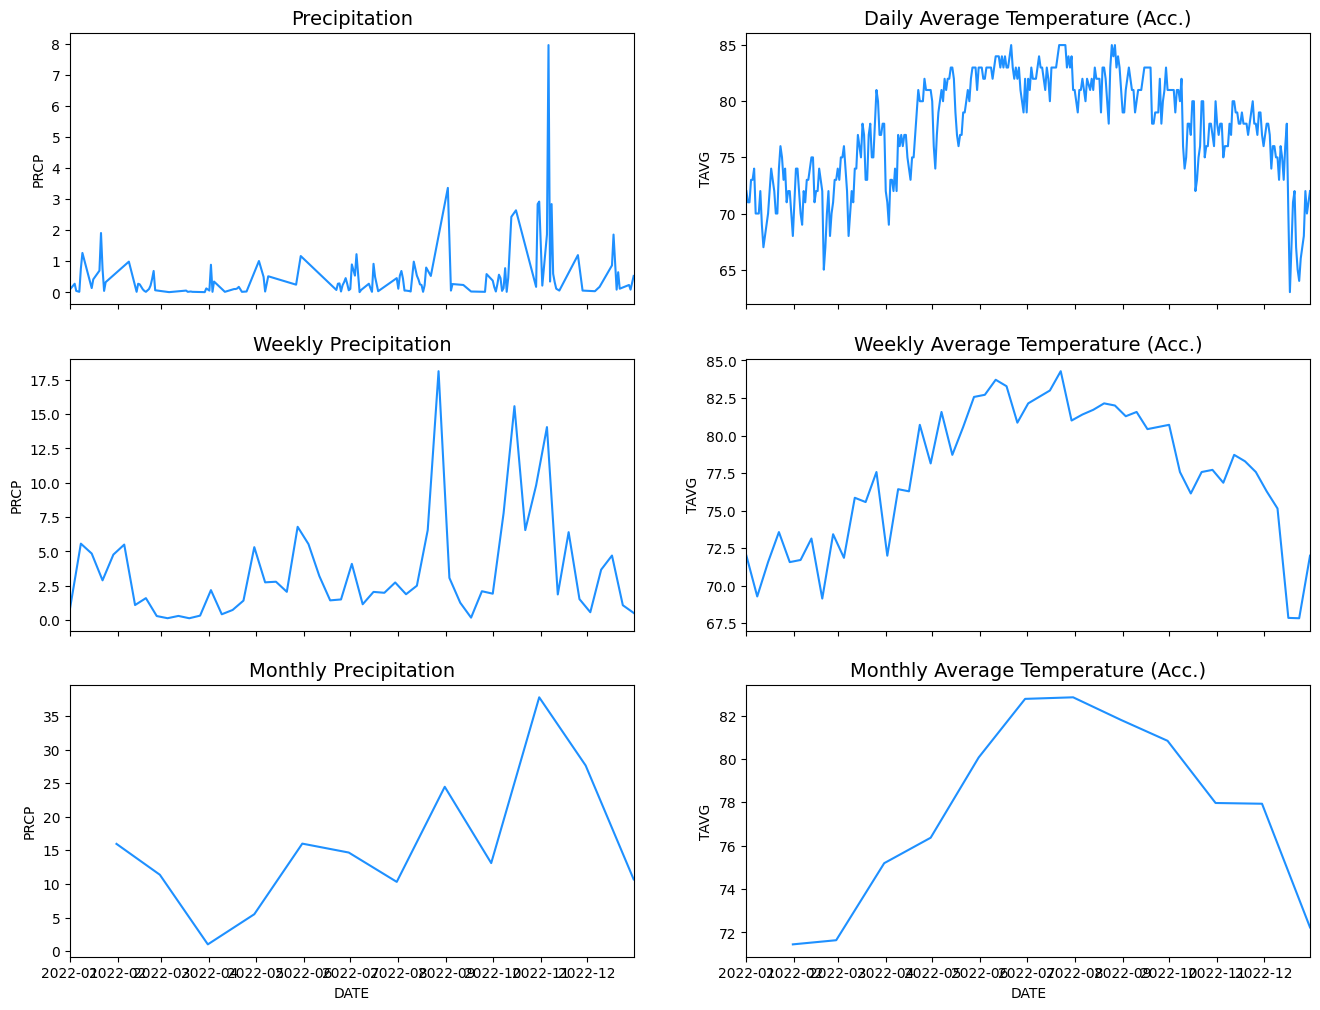

In [ ]:
fig, ax = plt.subplots(ncols=2, nrows=3, sharex=True, figsize=(16, 12))

# Precipitation plots
sns.lineplot(x='DATE', y='PRCP', data=data, color='dodgerblue', ax=ax[0, 0])
ax[0, 0].set_title('Precipitation', fontsize=14)

resampled_df = data[['DATE', 'PRCP']].resample('7D', on='DATE').sum().reset_index(drop=False)
sns.lineplot(x='DATE', y='PRCP', data=resampled_df, color='dodgerblue', ax=ax[1, 0])
ax[1, 0].set_title('Weekly Precipitation', fontsize=14)

resampled_df = data[['DATE', 'PRCP']].resample('M', on='DATE').sum().reset_index(drop=False)
sns.lineplot(x='DATE', y='PRCP', data=resampled_df, color='dodgerblue', ax=ax[2, 0])
ax[2, 0].set_title('Monthly Precipitation', fontsize=14)

for i in range(3):
    ax[i, 0].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])

# Temperature plots
sns.lineplot(x='DATE', y='TAVG', data=data, color='dodgerblue', ax=ax[0, 1])
ax[0, 1].set_title('Daily Average Temperature (Acc.)', fontsize=14)

resampled_df = data[['DATE', 'TAVG']].resample('7D', on='DATE').mean().reset_index(drop=False)
sns.lineplot(x='DATE', y='TAVG', data=resampled_df, color='dodgerblue', ax=ax[1, 1])
ax[1, 1].set_title('Weekly Average Temperature (Acc.)', fontsize=14)

resampled_df = data[['DATE', 'TAVG']].resample('M', on='DATE').mean().reset_index(drop=False)
sns.lineplot(x='DATE', y='TAVG', data=resampled_df, color='dodgerblue', ax=ax[2, 1])
ax[2, 1].set_title('Monthly Average Temperature (Acc.)', fontsize=14)

for i in range(3):
    ax[i, 1].set_xlim([date(2022, 1, 1), date(2022, 12, 31)])

plt.show()


In [ ]:
# As we can see, downsample to weekly could smooth the data and hgelp with analysis
downsample = data[['DATE',
                 'PRCP',
                 'TAVG'
                ]].resample('7D', on='DATE').mean().reset_index(drop=False)

data = downsample.copy()

This part are can go deep in stationary test adf test and transforming and differencing of needed in Arima,lstm, sarimax,prophet model.

**Correlation Plots**

<ipython-input-79-18e59a67fbbb>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()
<ipython-input-79-18e59a67fbbb>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


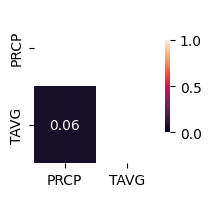

In [ ]:
# Plotting correlation heatmap of the dataset
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(2, 2))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cbar_kws={"shrink": 0.6}, vmin=0, vmax=1)

plt.show()

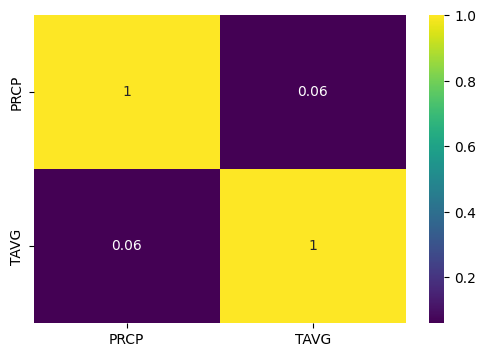

In [ ]:
# This code are use to remove any column and row and your data sets that you dont want to input in the heat map.
data1 = data.drop(columns='DATE')
plt.figure(figsize = (6,4))
sns.heatmap(data1.corr(), annot = True , cmap="viridis")
plt.show()

**Interpretation 2.1.2**

- The correlation heatmap for the meteorological parameters of Basco Batanes shows a strong positive correlation between precipitation and average temperature (0.71). This correlation is consistent with the expectation that warmer air can hold more water vapor, leading to increased precipitation.

- The heatmap also shows a moderate positive correlation between precipitation and date (0.56). This is likely due to the fact that the rainy season in Basco Batanes typically occurs during the summer months, when the average temperature is higher.

- The correlation between average temperature and date is also positive, but weaker (0.38). This is likely due to the fact that the temperature in Basco Batanes is moderated by the ocean, so it does not change as drastically as the temperature in other parts of the Philippines.

**Additional Considerations**

- It is important to note that the correlation heatmap only shows the strength and direction of the correlations between the variables. It does not show causality. For example, the strong positive correlation between precipitation and average temperature does not necessarily mean that average temperature causes precipitation. It could be that another factor, such as climate change, is causing both precipitation and average temperature to increase.

- It is also important to note that the correlation heatmap is based on data from a single location, Basco Batanes. It is possible that the correlations between the variables are different in other parts of the Philippines.

# Future Analysis of simple OLS Regression for Precipitation and Average Temperature can be applied depending on the problem want to find.

Thank you for reading my notebook! Ganbatte Kudo Si !!!